In [17]:
import numpy as np
import pandas as pd
import scipy as sp
import statsmodels.api as smapi
import seaborn as sns

In [4]:
!ls data

Advertising.csv carseats.csv    khan_xtrain.csv portfolio.csv   weekly.csv
Credit.csv      college.csv     khan_ytest.csv  smarket.csv
auto.csv        default.csv     khan_ytrain.csv titanic.csv
boston.csv      hitters.csv     nci60_data.csv  usarrests.csv
caravan.csv     khan_xtest.csv  nci60_labs.csv  wage.csv


In [6]:
default = pd.read_csv("./data/default.csv")

In [7]:
default.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


(-100, 2500)

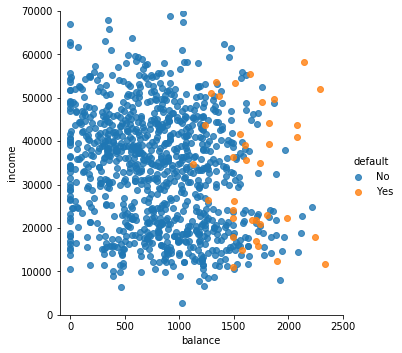

In [10]:
import matplotlib.pyplot as plt
sns.lmplot('balance', 'income', data=default.sample(1000), hue='default', fit_reg=False)

plt.ylim([0,70000])
plt.xlim([-100,2500])

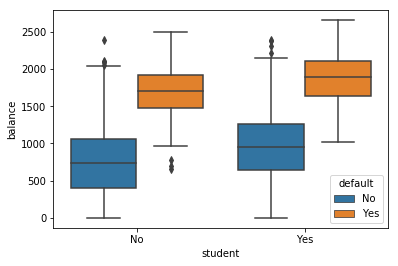

In [11]:
sns.boxplot('student', 'balance', data=default, hue='default');

In [12]:
import statsmodels.formula.api as smf

default["Yes"] = (default['default'] == 'Yes').astype(int)

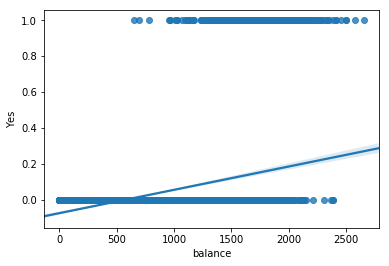

In [13]:
sns.regplot('balance', 'Yes', data=default)

In [14]:
results = smf.logit('Yes ~ balance', data=default).fit()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


In [15]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 May 2019   Pseudo R-squ.:                  0.4534
Time:                        13:59:42   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

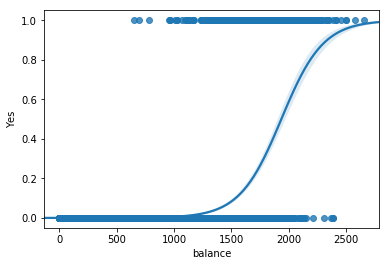

In [16]:
sns.regplot('balance', 'Yes', data=default, logistic=True)

In [24]:
from sklearn.linear_model import LogisticRegression

logit = LogisticRegression()

X = np.column_stack((np.ones(default.shape[0]),  default['balance']))

In [25]:
logit.fit(X, default['Yes'])

/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [26]:
logit.coef_

array([[-4.99233917,  0.00509773]])

In [29]:
# predict 1000 dollar balance default
logit.predict_proba([[1, 1000]]) # 99 percent chance no default

array([[0.99251209, 0.00748791]])

In [31]:
#predict 2000 dollar balance default
logit.predict_proba([[1, 2000]])

array([[0.4474996, 0.5525004]])

In [32]:
#predict 3000 dollar balance default
logit.predict_proba([[1, 3000]])

array([[0.00492494, 0.99507506]])

In [36]:
# Multiple Linear Regression

results = smf.logit('Yes ~ balance + student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Thu, 09 May 2019   Pseudo R-squ.:                  0.4619
Time:                        14:08:47   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [34]:
results = smf.logit('Yes ~ student', data=default).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 09 May 2019   Pseudo R-squ.:                0.004097
Time:                        14:08:23   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
                                        LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [37]:
#Simposon's Paradon: The first model above with both balance and student show a negative relationship 
#between student and default - meaning that being a student decreases the likelihood 
#of defaulting. The second model shows the opposite, that being a student increases 
#the chance at defaulting. This can be explained by the fact that students have more 
#debt on average but compared to those with the same amount of debt they are less likely to default.

In [39]:
# Stock Market lab


stock_market_data = pd.read_csv('./data/smarket.csv')
stock_market_data.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [40]:
stock_market_data['Up'] = np.where(stock_market_data['Direction'] == 'Up', 1, 0)

In [43]:
X = stock_market_data[['Lag1', 'Lag2', 'Lag3', 'Lag4', 'Lag5']].values
y = stock_market_data['Up'].values

In [44]:
# replicating page 159 description, top of the page
train_mask = stock_market_data['Year']. values < 2005

X_train = X[train_mask]
X_test = X[~train_mask]
y_train = y[train_mask]
y_test = y[~train_mask]

In [45]:
X_train.shape

(998, 5)

In [47]:
train_mask.shape

(1250,)

In [49]:
results = smf.logit('Up ~ Lag1 + Lag2 + Lag3 + Lag4 + Lag5', data=stock_market_data).fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.691327
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                     Up   No. Observations:                 1250
Model:                          Logit   Df Residuals:                     1244
Method:                           MLE   Df Model:                            5
Date:                Thu, 09 May 2019   Pseudo R-squ.:                0.001651
Time:                        14:26:10   Log-Likelihood:                -864.16
converged:                       True   LL-Null:                       -865.59
                                        LLR p-value:                    0.7219
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0742      0.057      1.309      0.191      -0.037       0.185
Lag1          -0.0713      0.050     -1.424      0.155      -0.170       0.027
Lag2          -0.0441      0.050     -0.882      0.378      -0.142       0.054
Lag3           0.0092      0.050      0.185      0.853      -0.089       0.107
Lag4           0.0072      0.050      0.145      0.885      -0.091       0.105
Lag5           0.0093      0.049      0.188      0.851      -0.088       0.106
==============================================================================
"""

In [50]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/sahluwalia/sage/sage/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [51]:
from sklearn.metrics import confusion_matrix

# true on the left axis, predicted above
confusion_matrix(y_test, lr.predict(X_test))

array([[ 37,  74],
       [ 31, 110]])

In [52]:
147/ len(y_test)

0.5833333333333334

In [ ]:
# Out of the 68 predicted down, 37 actually were down days. 54% accurracy
# Out of the 184 predicted up, 110 actually were up. 60% accuracy.
# 58% total accuracy

In [68]:
y_pred = lr.predict(X_test)

In [74]:
up = y_pred[y_test == 1]
len(up) / len(y_pred)

0.5595238095238095

In [75]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

In [76]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
              solver='svd', store_covariance=False, tol=0.0001)

In [78]:
confusion_matrix(y_test, lda.predict(X_test))

array([[ 37,  74],
       [ 30, 111]])

In [80]:
lda.priors_

array([0.49198397, 0.50801603])

In [81]:
# use QDA with only 2 variables
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train[:,:2], y_train)

QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0,
               store_covariance=False, store_covariances=None, tol=0.0001)

In [82]:
#almost exact same as logistic regression
confusion_matrix(y_test, qda.predict(X_test[:,:2]))

array([[ 30,  81],
       [ 20, 121]])

In [84]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn.fit(X_train[:,:2], y_train)

confusion_matrix(y_test, knn.predict(X_test[:, :2]))

array([[40, 71],
       [59, 82]])